<a href="https://colab.research.google.com/github/PANCHALSD/MLUSION/blob/main/mlusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/TY_263/depression_data.zip'  # Update if your zip name is different
extract_path = '/content/depression_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os
os.listdir(extract_path)


['Depression-Dataset.csv']

In [ ]:
import pandas as pd

file_path = extract_path + '/Depression-Dataset.csv'
df = pd.read_csv(file_path)

df.head()

,AGERNG,GENDER,EDU,PROF,MARSTS,RESDPL,LIVWTH,ENVSAT,POSSAT,FINSTR,...,ANXI,DEPRI,ABUSED,CHEAT,THREAT,SUICIDE,INFER,CONFLICT,LOST,DEPRESSED
0,26-30,Female,Post Graduate,Unemployed,Unmarried,Town,With Family,Yes,Yes,No,...,Yes,No,No,No,No,No,No,Yes,No,0
1,26-30,Male,Post Graduate,Service holder (Private),Unmarried,City,With Family,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,Yes,No,No,1
2,21-25,Male,HSC,Student,Unmarried,City,With Family,Yes,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,0
3,16-20,Male,HSC,Student,Unmarried,City,With Family,No,Yes,No,...,Yes,Yes,No,Yes,No,No,No,No,No,1
4,21-25,Male,Graduate,Student,Unmarried,Town,With Family,No,Yes,Yes,...,Yes,Yes,No,No,No,No,Yes,Yes,No,1


In [ ]:
#data cleaning
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGERNG     604 non-null    object
 1   GENDER     604 non-null    object
 2   EDU        604 non-null    object
 3   PROF       604 non-null    object
 4   MARSTS     604 non-null    object
 5   RESDPL     604 non-null    object
 6   LIVWTH     604 non-null    object
 7   ENVSAT     604 non-null    object
 8   POSSAT     604 non-null    object
 9   FINSTR     604 non-null    object
 10  DEBT       604 non-null    object
 11  PHYEX      604 non-null    object
 12  SMOKE      604 non-null    object
 13  DRINK      604 non-null    object
 14  ILLNESS    604 non-null    object
 15  PREMED     604 non-null    object
 16  EATDIS     604 non-null    object
 17  AVGSLP     604 non-null    object
 18  INSOM      604 non-null    object
 19  TSSN       604 non-null    object
 20  WRKPRE     604 non-null    objec

,0
AGERNG,0
GENDER,0
EDU,0
PROF,0
MARSTS,0
RESDPL,0
LIVWTH,0
ENVSAT,0
POSSAT,0
FINSTR,0


In [ ]:
#drop files
df = df.dropna()

In [ ]:
print(df.columns)


Index(['AGERNG', 'GENDER', 'EDU', 'PROF', 'MARSTS', 'RESDPL', 'LIVWTH',
       'ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'PHYEX', 'SMOKE', 'DRINK',
       'ILLNESS', 'PREMED', 'EATDIS', 'AVGSLP', 'INSOM', 'TSSN', 'WRKPRE',
       'ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER',
       'CONFLICT', 'LOST', 'DEPRESSED'],
      dtype='object')


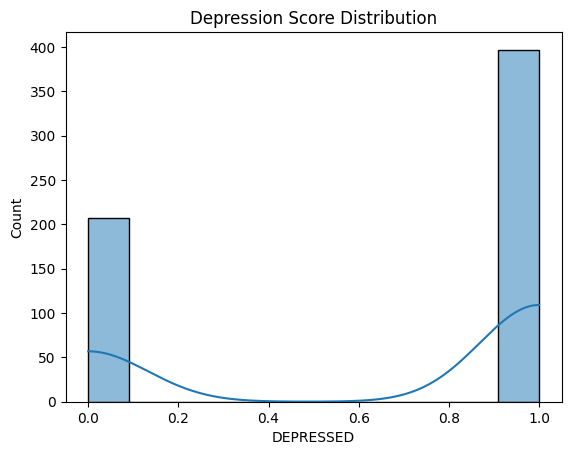

In [ ]:
#histogram visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['DEPRESSED'], kde=True)
plt.title("Depression Score Distribution")
plt.show()

In [ ]:
X = df.drop(columns=['DEPRESSED'])
y = df['DEPRESSED']

In [ ]:
#splitting dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (483, 30)
Test shape: (121, 30)


Training- Logistic Regression


In [ ]:

df_encoded = pd.get_dummies(df, drop_first=True)


X = df_encoded.drop(columns=['DEPRESSED'])
y = df_encoded['DEPRESSED']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


log_preds = log_model.predict(X_test)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.94      0.94      0.94        77

    accuracy                           0.92       121
   macro avg       0.91      0.91      0.91       121
weighted avg       0.92      0.92      0.92       121



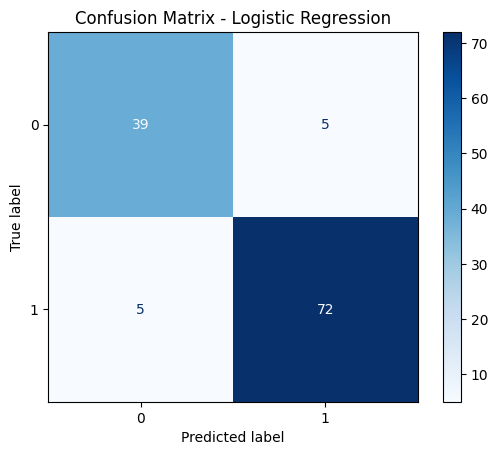

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


print("Logistic Regression Results:")
print(classification_report(y_test, log_preds))

#confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, log_preds), display_labels=log_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Training- Random Forest


 Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.89      0.92      0.90        77

    accuracy                           0.88       121
   macro avg       0.87      0.86      0.86       121
weighted avg       0.88      0.88      0.88       121



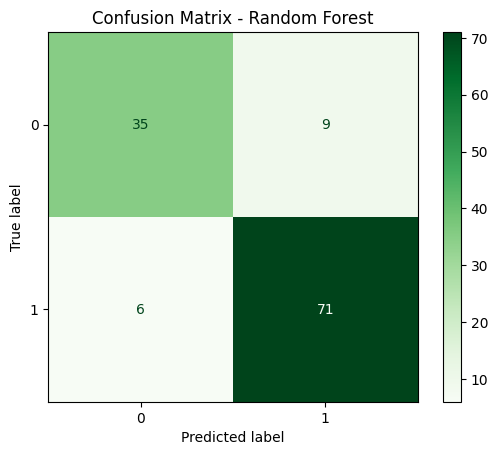

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_preds = rf_model.predict(X_test)


print(" Random Forest Classifier Results:")
print(classification_report(y_test, rf_preds))


disp = ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, cmap='Greens')
disp.ax_.set_title("Confusion Matrix - Random Forest")
plt.show()


Visualization of Logistic Regression and Random Forest with ROC curve

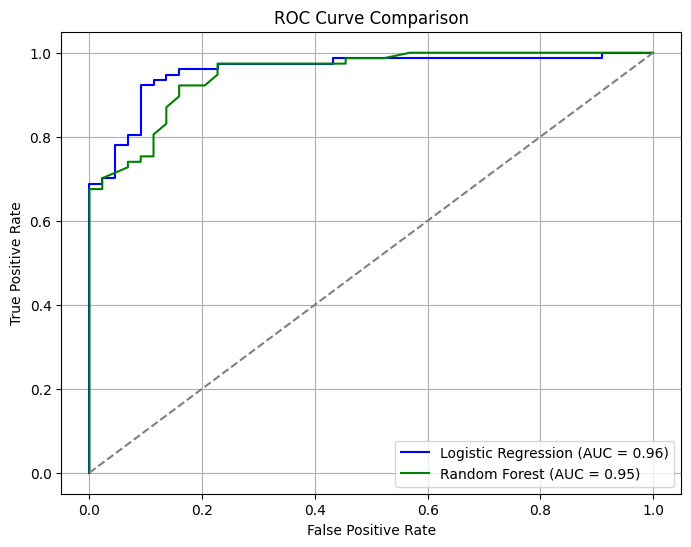

In [ ]:
from sklearn.metrics import roc_curve, auc


log_probs = log_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]


log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

log_auc = auc(log_fpr, log_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
#choosing the best model
import joblib

joblib.dump(log_model, 'logistic_model.pkl')

['logistic_model.pkl']

Testing

In [ ]:
import joblib

model = joblib.load('logistic_model.pkl')


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f" Final Test Accuracy: {acc * 100:.2f}%")


 Final Test Accuracy: 91.74%


In [ ]:

sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)

print("Prediction:", "Depressed" if prediction[0] == 1 else "Not Depressed")


Prediction: Not Depressed


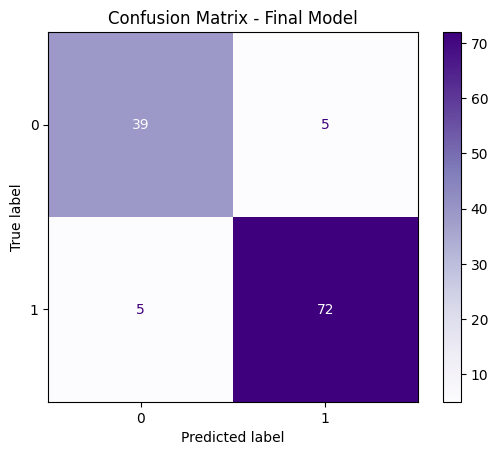

In [ ]:
#confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Purples')
plt.title("Confusion Matrix - Final Model")
plt.show()


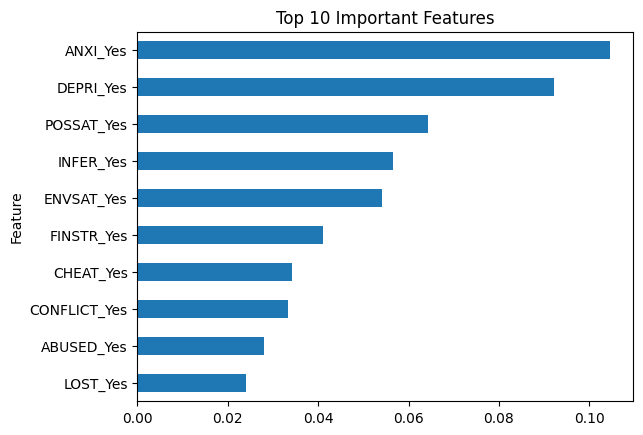

In [ ]:
#feature comparison
import pandas as pd

importances = rf_model.feature_importances_
feat_names = X.columns

feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df.sort_values('Importance', ascending=True).tail(10).plot.barh(x='Feature', y='Importance', legend=False)
plt.title("Top 10 Important Features")
plt.show()
